1. To Intialize spark in local notebook please run startjupyter.sh
source /Users/gkumargaur/workspace/scala/GCP-AI-Tensor/scripts/startjupyter.sh
2. run pyspark, this will open the notebook with spark enabled

In [98]:
import pandas as pd
import warnings
import datetime
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from google.cloud import bigquery
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
spark = SparkSession.builder \
  .config('spark.jars', 'gs://spark-lib/bigquery/spark-bigquery-latest_2.12.jar') \
  .getOrCreate()

In [99]:
df = spark.read \
  .format('bigquery') \
  .load('itd-aia-datalake.janus_graph.symbols_by_close').filter(col("Name") == 'UONE').orderBy("Date")
#df.show(10)
pndf = df.toPandas()
pndf.head(10)

,Name,Date,Open,Close,Low,High,AdjClose,Volume,record_ingestion_date
0,UONE,2021-05-12,4.63,4.87,4.60,4.87,4.87,379000.0,2021-05-12
1,UONE,2021-05-13,4.92,5.13,4.87,5.16,5.13,426000.0,2021-05-12
2,UONE,2021-05-14,5.10,5.22,5.00,5.29,5.22,328100.0,2021-05-12
3,UONE,2021-05-17,5.24,5.43,5.11,5.43,5.43,291900.0,2021-05-12
4,UONE,2021-05-18,5.48,5.32,5.22,5.60,5.32,369600.0,2021-05-12
5,UONE,2021-05-19,5.25,6.01,5.13,6.16,6.01,1973300.0,2021-05-12
6,UONE,2021-05-20,6.20,9.56,6.01,9.95,9.56,82053800.0,2021-05-12
7,UONE,2021-05-21,9.23,8.33,7.84,10.68,8.33,45980200.0,2021-05-12
8,UONE,2021-05-24,8.33,8.07,7.92,9.15,8.07,5747600.0,2021-05-12
9,UONE,2021-05-25,8.00,7.73,7.60,8.33,7.73,3074900.0,2021-05-12


In [100]:
pndf.set_index('Date',inplace=True)
pndf.head(10)

,Name,Open,Close,Low,High,AdjClose,Volume,record_ingestion_date
Date,,,,,,,,
2021-05-12,UONE,4.63,4.87,4.60,4.87,4.87,379000.0,2021-05-12
2021-05-13,UONE,4.92,5.13,4.87,5.16,5.13,426000.0,2021-05-12
2021-05-14,UONE,5.10,5.22,5.00,5.29,5.22,328100.0,2021-05-12
2021-05-17,UONE,5.24,5.43,5.11,5.43,5.43,291900.0,2021-05-12
2021-05-18,UONE,5.48,5.32,5.22,5.60,5.32,369600.0,2021-05-12
2021-05-19,UONE,5.25,6.01,5.13,6.16,6.01,1973300.0,2021-05-12
2021-05-20,UONE,6.20,9.56,6.01,9.95,9.56,82053800.0,2021-05-12
2021-05-21,UONE,9.23,8.33,7.84,10.68,8.33,45980200.0,2021-05-12
2021-05-24,UONE,8.33,8.07,7.92,9.15,8.07,5747600.0,2021-05-12


In [101]:
print('There are {} number of days in the dataset.'.format(pndf.shape[0]))

There are 21 number of days in the dataset.


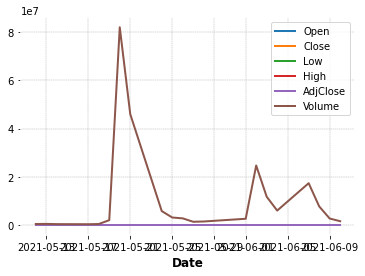

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
pndf.plot();

In [103]:
prices = pndf['Close']
volumes = pndf['Volume']

In [104]:
volumes.tail()

Date
2021-06-04     5955800.0
2021-06-07    17316800.0
2021-06-08     7697200.0
2021-06-09     2658100.0
2021-06-10     1542000.0
Name: Volume, dtype: float64

In [105]:
prices.head()

Date
2021-05-12    4.87
2021-05-13    5.13
2021-05-14    5.22
2021-05-17    5.43
2021-05-18    5.32
Name: Close, dtype: float64

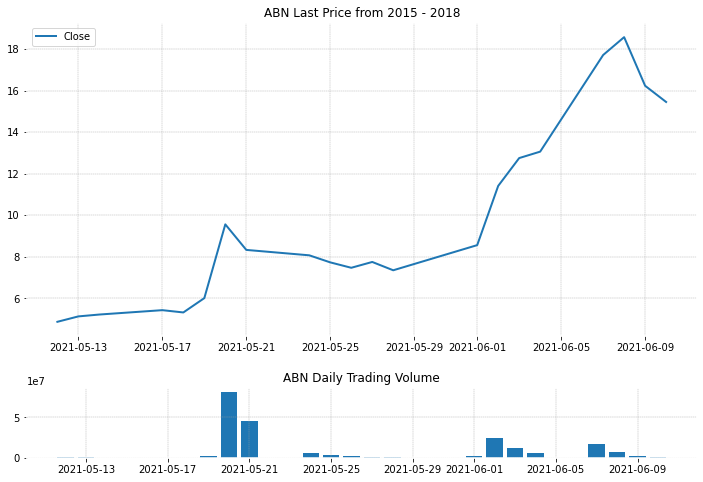

In [106]:
# The top plot consisting of dailing closing prices
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(prices.index, prices, label='Close')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=2)

# The bottom plot consisting of daily trading volume
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Daily Trading Volume')

plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

([<matplotlib.lines.Line2D at 0x10a87fb70>,
  <matplotlib.patches.Rectangle at 0x123ab8be0>])

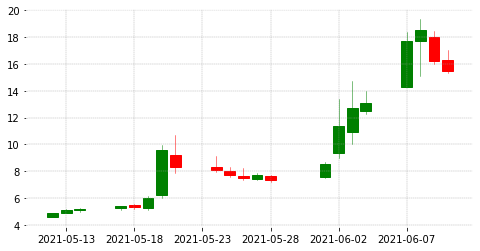

In [130]:
%matplotlib inline
import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


df_subset = pndf
df_subset.index = pd.to_datetime(df_subset.index)
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Close']]

figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8, 
                 colorup='green', 
                 colordown='red')


In [123]:
#mpf.plot(df_subset, type='candle', style='charles',title='S&P 500',ylabel='Price ($)',ylabel_lower='Shares \nTraded',volume=True, mav=(3,6,9))

In [127]:
print (df_ohlc.dtypes)

Date     float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


In [136]:
dcdf = df_ohlc[['Close']]
dcdf.head(10)

,Close
Date,
2021-05-12,4.87
2021-05-13,5.13
2021-05-14,5.22
2021-05-17,5.43
2021-05-18,5.32
2021-05-19,6.01
2021-05-20,9.56
2021-05-21,8.33
2021-05-24,8.07


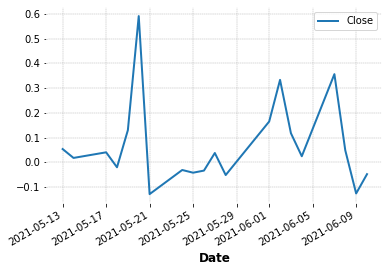

In [137]:
daily_changes = dcdf.pct_change(periods=1)
daily_changes.plot();

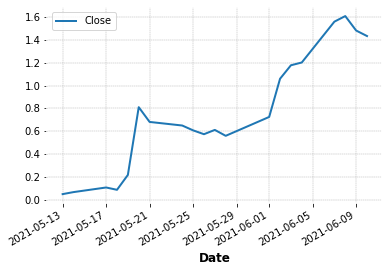

In [138]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

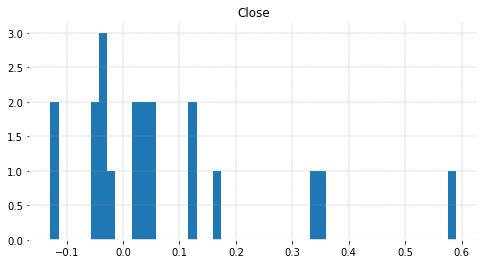

In [139]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [140]:
daily_changes.describe()

,Close
count,20.000000
mean,0.071569
std,0.176610
min,-0.128661
25%,-0.035759
50%,0.030898
75%,0.120505
max,0.590682


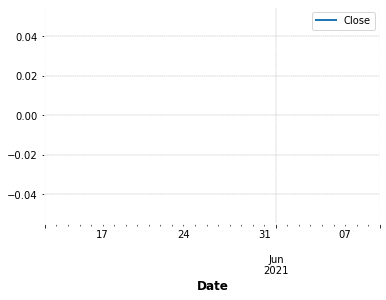

In [141]:
df_filled = dcdf.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();

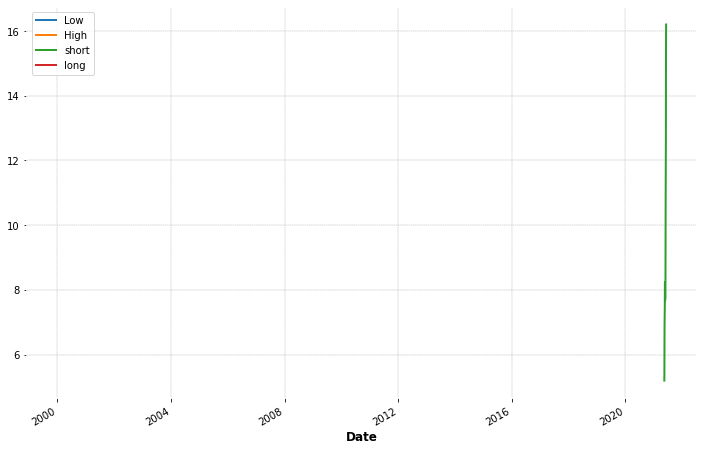

In [120]:
df_filled = pndf.asfreq('D', method='ffill')
df_last = pndf['Close']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

df_sma = pd.DataFrame(columns=['Low', 'High'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));